In [1]:
import os
import json
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def merge_dicts(base, new, key=""):
    """Create a flat dict structure"""
    if isinstance(new, dict):
        for new_key, val in new.items():
            if key:
                flat_key = key + ": " + new_key
            else:
                flat_key = new_key
            if flat_key not in base:
                base[flat_key] = []
            merge_dicts(base, val, key=flat_key)
    else:
        base[key].append(new)

In [3]:
def make_plots(which_files, flat_keys):

    for key in flat_keys:
        vals_to_plot = []
        try:
            for json_file in which_files:
                flat_dict = flat_dicts[json_file]
                vals = flat_dict[key]
                if vals and isinstance(vals[0], float) and not all([vals[0] == i for i in vals]):
                    vals_to_plot.append(vals)
        except:
            pass
        if len(vals_to_plot) > 0:
            for vals in vals_to_plot:
                plt.plot(vals)
            plt.legend(which_files, loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title(key)
            plt.show()

In [4]:
json_files = [f for f in os.listdir(".") if f[-len('.json'):] == ".json"]

In [8]:
flat_dicts = {}
flat_keys = set()

for json_file in json_files:
    with open(json_file, 'r') as f:
        data = json.load(f)
        flat_dict = {}
        for point in data['content']:
            merge_dicts(flat_dict, point)
        flat_keys = flat_keys.union(set(flat_dict.keys()))
        flat_dicts[json_file] = flat_dict

In [9]:
json_files

['decorator-psutils-alpine-1.json',
 'decorator-psutils-alpine-2.json',
 'decorator-psutils-alpine-3.json',
 'decorator-psutils-alpine-4.json',
 'decorator-psutils-alpine-5.json',
 'decorator-psutils-busybox-1.json',
 'decorator-psutils-busybox-2.json',
 'decorator-psutils-busybox-3.json',
 'decorator-psutils-busybox-4.json',
 'decorator-psutils-busybox-5.json',
 'decorator-psutils-centos-1.json',
 'decorator-psutils-centos-2.json',
 'decorator-psutils-centos-3.json',
 'decorator-psutils-centos-4.json',
 'decorator-psutils-centos-5.json',
 'decorator-psutils-nginx-1.json',
 'decorator-psutils-nginx-2.json',
 'decorator-psutils-nginx-3.json',
 'decorator-psutils-nginx-4.json',
 'decorator-psutils-nginx-5.json',
 'decorator-psutils-ubuntu-1.json',
 'decorator-psutils-ubuntu-2.json',
 'decorator-psutils-ubuntu-3.json',
 'decorator-psutils-ubuntu-4.json',
 'decorator-psutils-ubuntu-5.json']

In [10]:
alpine = [f for f in json_files if "alpine" in f]
busybox = [f for f in json_files if "busybox" in f]
ubuntu = [f for f in json_files if "ubuntu" in f]
nginx =  [f for f in json_files if "nginx" in f]
centos =  [f for f in json_files if "centos" in f]

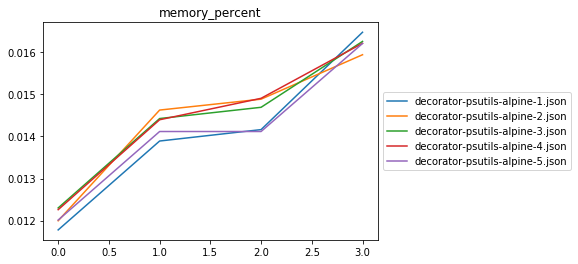

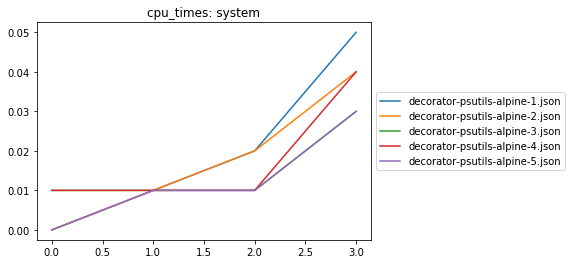

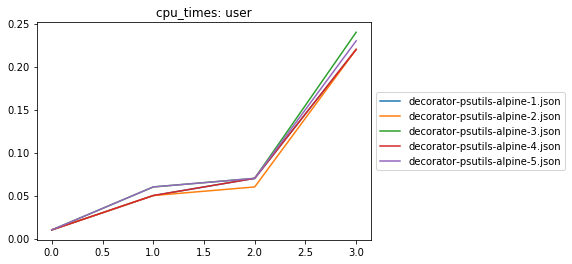

In [11]:
make_plots(alpine, flat_keys)

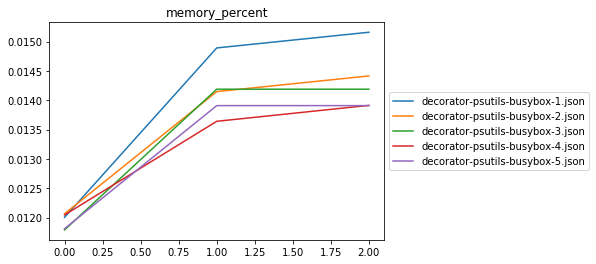

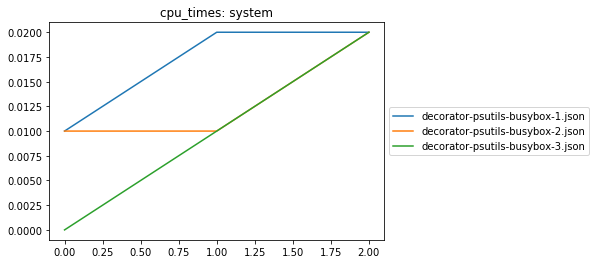

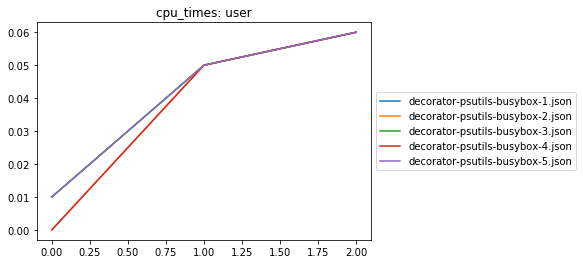

In [12]:
make_plots(busybox, flat_keys)

In [16]:
make_plots(ubuntu, flat_keys)

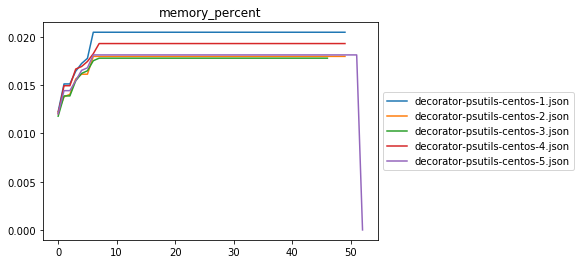

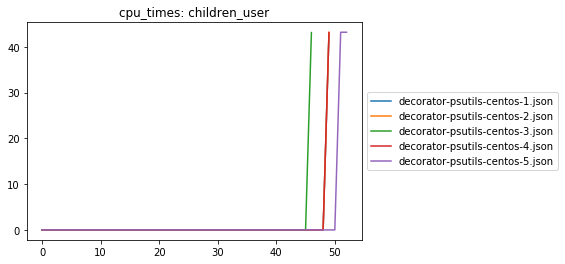

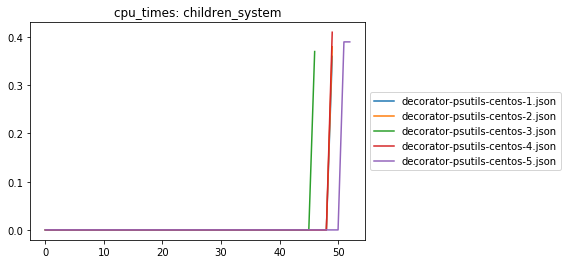

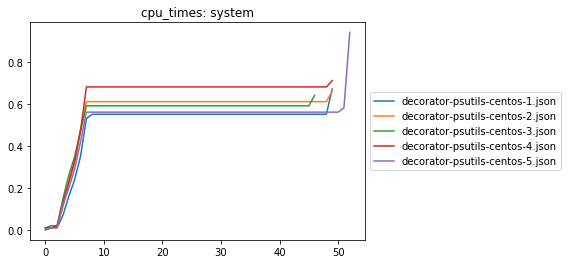

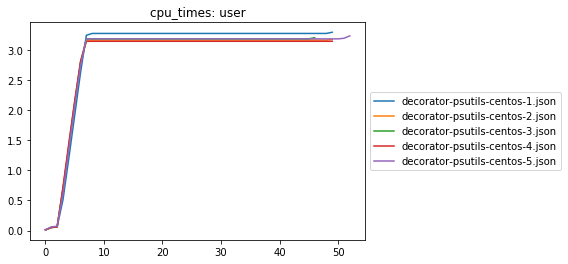

In [17]:
make_plots(centos, flat_keys)

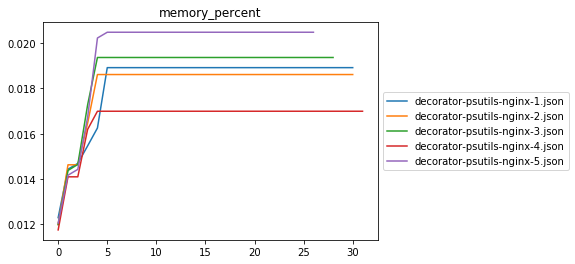

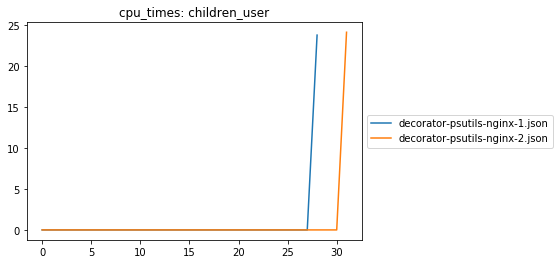

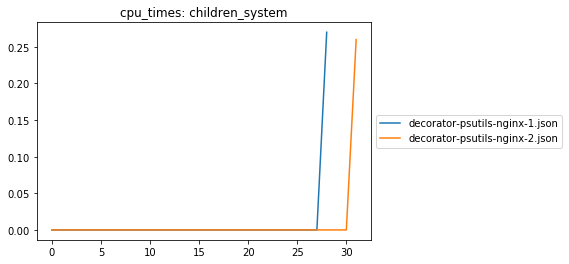

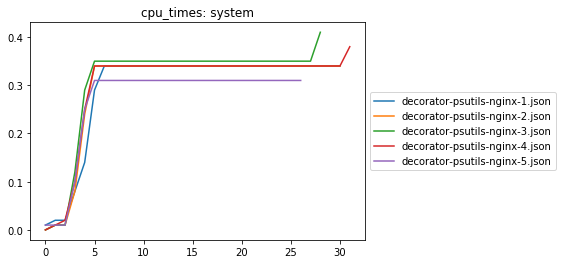

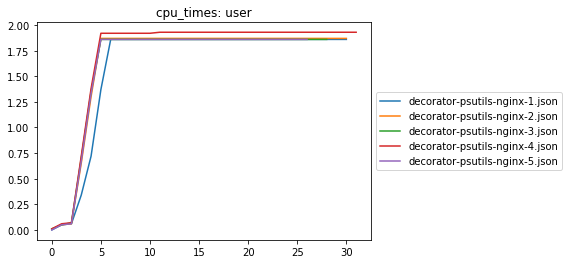

In [18]:
make_plots(nginx, flat_keys)